<a href="https://colab.research.google.com/github/WesleySouza13/Previs-o-de-A-es-da-Petrobras-com-LSTM/blob/main/SERIES_TEMPORAIS_LSTM_PRECO_A%C3%87OES_PETROBRAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import torch
from torch import nn, optim

In [ ]:
torch.manual_seed(123)

In [ ]:
df = pd.read_csv('/content/petr4_treinamento.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [ ]:
df.isnull().sum()
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


Text(0, 0.5, 'Quantidade')

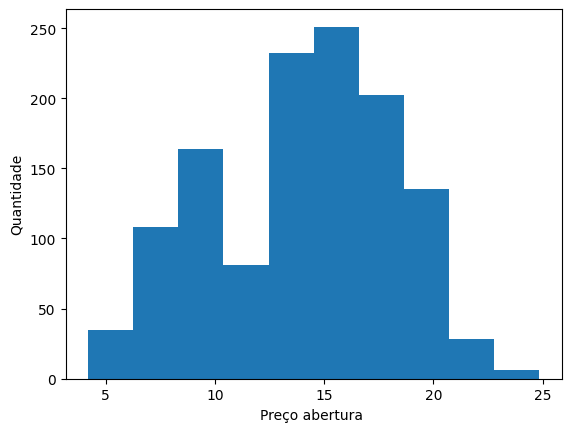

In [ ]:
plt.hist(df['Open'])
plt.xlabel('Preço abertura ')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

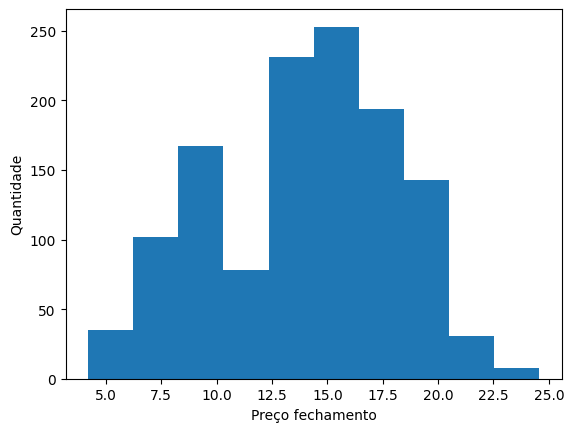

In [ ]:
plt.hist(df['Close'])
plt.xlabel('Preço fechamento')
plt.ylabel('Quantidade')

In [ ]:
base_treino = df.iloc[:,1:7].values #utilizamos todos os atributos previsores, menos a data
normalizador = MinMaxScaler() #esse normalizador, coloca nossos dados entre 0 e 1

In [ ]:
base_treino

array([[1.9990000e+01, 2.0209999e+01, 1.9690001e+01, 1.9690001e+01,
        1.8086271e+01, 3.0182600e+07],
       [1.9809999e+01, 2.0400000e+01, 1.9700001e+01, 2.0400000e+01,
        1.8738441e+01, 3.0552600e+07],
       [2.0330000e+01, 2.0620001e+01, 2.0170000e+01, 2.0430000e+01,
        1.8766001e+01, 3.6141000e+07],
       ...,
       [1.5990000e+01, 1.6139999e+01, 1.5980000e+01, 1.6049999e+01,
        1.6017963e+01, 2.3552200e+07],
       [1.6100000e+01, 1.6129999e+01, 1.6000000e+01, 1.6100000e+01,
        1.6067865e+01, 1.9011500e+07],
       [1.6100000e+01, 1.6100000e+01, 1.6100000e+01, 1.6100000e+01,
        1.6067865e+01, 0.0000000e+00]])

In [ ]:
base_treino_normalizada = normalizador.fit_transform(base_treino)
base_treino_normalizada

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       ...,
       [0.57122093, 0.57537562, 0.60696008, 0.58202356, 0.58202349,
        0.03369652],
       [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
        0.02720006],
       [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.58447937,
        0.        ]])

In [ ]:
base_treino_normalizada.shape

(1242, 6)

In [ ]:
###estrutura de dados
##irei explicar passo a passo do codigo
x = [] #lista vazia para previsores
y = [] #lista vazia para previsao

for i in range(90,1242): #criamos um loop para coletar dados acima de 90 dias apos a coleta
  x.append(base_treino_normalizada[i-90:i,0:6]) #o metodo append,add um elemento ao final da lista, com isso, ele vai adiconar os intervalos de i ate 90 ao final da lista x
  y.append(base_treino_normalizada[i,0])#seguindo a mesma logica explicada do append, é adicionado o valor de i ao final da lista
x,y = np.array(x), np.array(y) ##converteremos as repectivas listas para um array do numpy

In [ ]:
x[1]

array([[0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       [0.78875969, 0.7949588 , 0.81013311, 0.77996075, 0.70144373,
        0.04015963],
       [0.77083338, 0.77363063, 0.78505624, 0.75147351, 0.67522435,
        0.0416214 ],
       [0.74806197, 0.75618037, 0.78505624, 0.76031438, 0.68336137,
        0.03485382],
       [0.75436047, 0.76490543, 0.78915051, 0.76768177, 0.69014234,
        0.02507502],
       [0.75823643, 0.76442079, 0.79733884, 0.77013751, 0.6924025 ,
        0.0260728 ],
       [0.76598837, 0.77411537, 0.79682707, 0.76227897, 0.68516964,
        0.0404927 ],
       [0.76598837, 0.77411537, 0.79682707, 0.76719061, 0.68969016,
        0.0423977 ],
       [0.76017437, 0.75714973, 0.79222108, 0.76817293, 0.69059437,
        0.02401858],
       [0.75872098, 0.75908871, 0.79222108, 0.76178781, 0.68471746,
        0.02821315],
       [0.75581391, 0

In [ ]:
y[1]

0.7611434108527131

In [ ]:
##para a construção do modelo, o pytorch tem como pedido que transformamos nossas listas x e y para tensores

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [ ]:
#criaremos variaveis que receberão nosso dataset do torch
dataset = torch.utils.data.TensorDataset(x,y)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle = True)

In [ ]:
dataset

In [ ]:
loader

In [ ]:
##criação da LSTM
class LSTM(nn.Module):
  def __init__(self):
    super().__init__()
## 6 -> 100 -> 50 -> 50 -> 1
    self.LSTM1 = nn.LSTM(input_size=6, hidden_size = 100)
    self.LSTM2 = nn.LSTM(100,50)
    self.LSTM3 = nn.LSTM(50,50, dropout=0.3, num_layers = 2)
    self.Dropout = nn.Dropout(p=0.3)
    self.Linear = nn.Linear(50,1)
    self.Sigmoid = nn.Sigmoid()

#arquiterura da rede
  def forward(self, x):


    x = x.permute(1,0,2)
    x,_ = self.LSTM1(x)
    x = self.Dropout(x)
    x,_ = self.LSTM2(x)
    x = self.Dropout(x)
    x,_ = self.LSTM3(x)
    x = x[-1]
    x = self.Dropout(x)
    x = self.Linear(x)
    x = self.Sigmoid(x)
    return x




In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
regressor = LSTM()
criterion = nn.MSELoss()
optimizer = optim.Adam(regressor.parameters())

regressor.to(device)

LSTM(
  (LSTM1): LSTM(6, 100)
  (LSTM2): LSTM(100, 50)
  (LSTM3): LSTM(50, 50, num_layers=2, dropout=0.3)
  (Dropout): Dropout(p=0.3, inplace=False)
  (Linear): Linear(in_features=50, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
ES_PATIENCE = 10 ##essa função faz o codigo parar de funcionar se não ouver melhoria apos 10 epocas

In [ ]:
for epoch in range(100):
  running_loss = 0
  running_mae = 0

  for i, data in enumerate(loader):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = regressor(inputs)
    outputs = outputs.flatten()

    loss = criterion(outputs,labels)
    loss.backward()

    optimizer.step()

    running_loss +=loss.item()

    mae =mean_absolute_error(labels.detach().cpu().numpy().flatten(),
                             outputs.detach().cpu().numpy().flatten())

    # Imprimindo os dados referentes a esse loop
    print('\rÉpoca {:3d} - Loop {:3d} de {:3d}: custo {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader), loss, mae), end = '\r')

    # Imprimindo os dados referentes a essa época
    running_loss /= len(loader)
    running_mae /= len(loader)
    print('ÉPOCA {:3d} FINALIZADA: custo {:03.6f} - MAE {:03.6f}     '.format(epoch+1, running_loss, running_mae))



ÉPOCA   1 FINALIZADA: custo 0.001028 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001084 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.000954 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001250 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001099 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001303 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.000789 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001198 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001236 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001154 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.000805 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.000887 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001240 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001018 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.000950 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.001146 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.000543 - MAE 0.000000     
ÉPOCA   1 FINALIZADA: custo 0.0

In [ ]:
##importação base de dados de teste
base_teste = pd.read_csv('/content/petr4_teste.csv')
preco_real_teste = base_teste.iloc[:,1:2].values
base_completa = pd.concat([df, base_teste])

In [ ]:
base_completa.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
17,2018-01-25,19.340000,19.340000,19.340000,19.340000,19.301397,0.0
18,2018-01-26,19.620001,19.980000,19.100000,19.930000,19.890221,81989500.0
19,2018-01-29,19.670000,20.049999,19.570000,19.850000,19.810381,55726200.0
20,2018-01-30,19.770000,19.770000,19.360001,19.490000,19.451097,46203000.0
21,2018-01-31,19.740000,19.930000,19.680000,19.700001,19.660681,41576600.0


In [ ]:
base_completa = base_completa.drop('Date', axis = 1)

In [ ]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = normalizador.fit_transform(entradas)

In [ ]:
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0:6])
X_teste = np.array(X_teste)

In [ ]:
X_teste = torch.tensor(X_teste, device = device, dtype = torch.float32)

In [ ]:
regressor.eval()
previsoes = regressor(X_teste)
previsoes = previsoes.detach().cpu().numpy().reshape(-1, 1)

In [ ]:
previsoes

array([[0.37484032],
       [0.43231323],
       [0.47004044],
       [0.48454535],
       [0.4853678 ],
       [0.50766885],
       [0.5200225 ],
       [0.48333156],
       [0.53195983],
       [0.5526428 ],
       [0.5574275 ],
       [0.60927   ],
       [0.7117353 ],
       [0.70249945],
       [0.7108433 ],
       [0.73578495],
       [0.6951502 ],
       [0.8158314 ],
       [0.8493599 ],
       [0.90662485],
       [0.92088866],
       [0.9061377 ]], dtype=float32)

In [ ]:
normalizador_previsao = MinMaxScaler(feature_range = (0, 1))
normalizador_previsao.fit(base_treino[:, 0:1])

MinMaxScaler()

In [ ]:
previsoes = normalizador_previsao.inverse_transform(previsoes)

In [ ]:
previsoes

array([[11.936704],
       [13.122945],
       [13.901634],
       [14.201015],
       [14.217992],
       [14.678285],
       [14.933264],
       [14.175963],
       [15.17965 ],
       [15.606547],
       [15.705304],
       [16.775331],
       [18.890217],
       [18.699589],
       [18.871805],
       [19.3866  ],
       [18.5479  ],
       [21.03876 ],
       [21.73079 ],
       [22.912737],
       [23.207142],
       [22.902681]], dtype=float32)

In [ ]:
previsoes.mean()

17.301039

In [ ]:
preco_real_teste.mean()

17.87454563636364

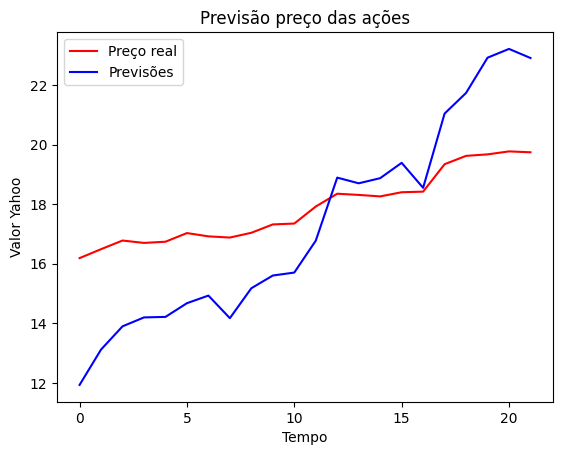

In [ ]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()